# Perturbation Methods

### Exercise 2

Find the market-clearing wage rate.

In [2]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

# choose approximation point
k0 = 5.

# set value for epsilon
eps = .01

# set values for parameters
alpha = .33
z = 1.
b = 2.
t = .1
h = 24.

# define demand function
nd = lambda w,k: (((1-alpha)*z/w)**(1/alpha)) * k
# define profit function
pr = lambda w,k: z * k**alpha * nd(w,k)**(1-alpha) - w*nd(w,k)
# define supply function
ns = lambda w,k: h - (b/(w*(1+b)))*(w*h + pr(w,k) - t)
# define excess demand function
excess = lambda w,k: nd(w,k) - ns(w,k)

#  create anonymous function
f = lambda w: excess(w, k0)

#  use fsolve to find equlibrium wage
w0 = opt.fsolve(f, .1)
print ('w0: ', w0)

#  check solution
check = excess(w0, k0)
print ('check: ', check)

w0:  [0.62736178]
check:  [0.]


Find a first-order approxmation for wage as a function of $k$ and a second-order approxmation for wage as a function of $k$. Approximate about $k = 5$.

In [3]:
# define a function to compute first-order and second-order derivatives
def Bnumdiff3(g, w0, k0, eps):
    fA = g(w0-eps, k0+2*eps)
    fB = g(w0, k0+2*eps)
    fC = g(w0+eps, k0+2*eps)
    fD = g(w0-2*eps, k0+eps)
    fE = g(w0-eps, k0+eps)
    fF = g(w0, k0+eps)
    fG = g(w0+eps, k0+eps)
    fH = g(w0+2*eps, k0+eps)
    fI = g(w0-2*eps, k0)
    fJ = g(w0-eps, k0)
    fK = g(w0, k0)
    fL = g(w0+eps, k0)
    fM = g(w0+2*eps, k0)
    fN = g(w0-2*eps, k0-eps)
    fP = g(w0-eps, k0-eps)
    fQ = g(w0, k0-eps)
    fR = g(w0+eps, k0-eps)
    fS = g(w0+2*eps, k0-eps)
    fT = g(w0-eps, k0-2*eps)
    fU = g(w0, k0-2*eps)
    fV = g(w0+eps, k0-2*eps)
    
    # First-order difference
    Fw = (fL - fJ) / (2*eps)
    Fk = (fF - fQ) / (2*eps)
    
    # Second-order difference
    Fww = (fL - 2*fK + fJ) / (eps**2)
    Fkk = (fF - 2*fK + fQ) / (eps**2)
    Fkw = (fG - fE - fR + fP) / (4*eps**2)
    
    # Third-order difference
    Fwww = (fM - 2*fL + 2*fJ - fI) / (2*eps**3)
    Fwwk = (fH - 2*fF - fS + fD + 2*fQ - fN) / (8*eps**3)
    Fwkk = (fA - 2*fJ - fC + fT + 2*fL - fV) / (8*eps**3)
    Fkkk = (fB - 2*fF + 2*fQ - fU) / (2*eps**3)
    
    
    return Fw, Fk, Fww, Fkw, Fkk, Fwww, Fwwk, Fwkk, Fkkk

# get derivatives from numerical differentiator
Fw, Fk, Fww, Fkw, Fkk, Fwww, Fkww, Fkkw, Fkkk = \
    Bnumdiff3(excess, w0, k0, eps)
    
# get coefficients using perturbation formulas
w1 = - Fk/Fw
w2 = -(Fww*w1**2 + 2*Fkw*w1 + Fkk)/Fw
w3 = -(Fwww*w1**3 + 3*(Fkww*w1**2 + Fkkw*w1 + Fww*w2*w1 + Fkw*w2) + Fkkk) / Fw

print('w1: ', w1)
print('w2: ', w2)
print('w3: ', w3)

w1:  [0.04154998]
w2:  [-0.00557955]
w3:  [0.00186723]


Set up a grid on the space between $k = 1$ and $k = 15$. Find the equilibrium value of the wage at each point on the grid and the linear and quadratic approximations. Plot the results.

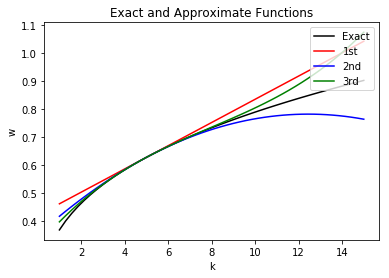

In [4]:
# set up a grid
kmin = 1
kmax = 15
nstep = 50
kgrid = np.linspace(kmin, kmax, num=nstep)
wgrid = np.zeros(nstep)
w1grid = np.zeros(nstep)
w2grid = np.zeros(nstep)
w3grid = np.zeros(nstep)

#  get solutions at each point on the grid
for i in range(0, nstep):
    # find exact solutions
    # create anonymous function
    f = lambda w: excess(w, kgrid[i])
    # use fsolve to find equilibrium wage
    wgrid[i] = opt.fsolve(f, .1)
    # evaluate approximations 
    w1grid[i] = w0 + w1*(kgrid[i] - k0)
    w2grid[i] = w1grid[i] + .5*w2*(kgrid[i] - k0)**2
    w3grid[i] = w2grid[i] + (1/6)*w3*(kgrid[i]-k0)**3

# plot results
plt.plot(kgrid, wgrid, 'k-',
         kgrid, w1grid, 'r-',
         kgrid, w2grid, 'b-',
         kgrid, w3grid, 'g-')
plt.legend(['Exact', '1st', '2nd', '3rd'], loc=1)
plt.title('Exact and Approximate Functions')
plt.xlabel('k')
plt.ylabel('w')
plt.show()

Repeat the above exercise when the approximation point is $k = 10$.

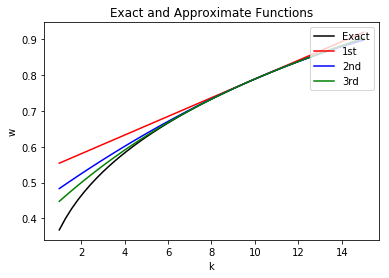

In [5]:
k0 = 10.
f = lambda w: excess(w, k0)
w0 = opt.fsolve(f, .1)

# get derivatives from numerical differentiator
Fw, Fk, Fww, Fkw, Fkk, Fwww, Fkww, Fkkw, Fkkk = \
    Bnumdiff3(excess, w0, k0, eps)

# get coefficients using perturbation formulas
w1 = - Fk/Fw
w2 = -(Fww*w1**2 + 2*Fkw*w1 + Fkk)/Fw
w3 = -(Fwww*w1**3 + 3*(Fkww*w1**2 + Fkkw*w1 + Fww*w2*w1 + Fkw*w2) + Fkkk) / Fw

# set up a grid
kmin = 1
kmax = 15
nstep = 50
kgrid = np.linspace(kmin, kmax, num=nstep)
wgrid = np.zeros(nstep)
w1grid = np.zeros(nstep)
w2grid = np.zeros(nstep)
w3grid = np.zeros(nstep)

#  get solutions at each point on the grid
for i in range(0, nstep):
    # find exact solutions
    # create anonymous function
    f = lambda w: excess(w, kgrid[i])
    # use fsolve to find equilibrium wage
    wgrid[i] = opt.fsolve(f, .1)
    # evaluate approximations 
    w1grid[i] = w0 + w1*(kgrid[i] - k0)
    w2grid[i] = w1grid[i] + .5*w2*(kgrid[i] - k0)**2
    w3grid[i] = w2grid[i] + (1/6)*w3*(kgrid[i]-k0)**3

# plot results
plt.plot(kgrid, wgrid, 'k-',
         kgrid, w1grid, 'r-',
         kgrid, w2grid, 'b-',
         kgrid, w3grid, 'g-')
plt.legend(['Exact', '1st', '2nd', '3rd'], loc=1)
plt.title('Exact and Approximate Functions')
plt.xlabel('k')
plt.ylabel('w')
plt.show()

### Exercise 3

The functional form of the cubic approximation is:
y =  [47.46578754] +  [0.47108525] (x-100) + (1/2)* [-1.31865122e-05] (x-100)^2 + (1/6)* [-0.00436998] (x-100)^3


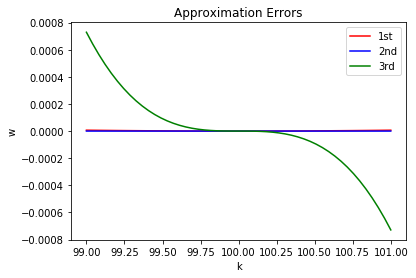

In [7]:
F = lambda x,y: ((x**.35) + .9*x - y)**(-2.5) - .95*((y**.35) + .9*y)**(-2.5)
f = lambda y: F(x0, y)

x0 = 100
y0 = opt.fsolve(f, .1)
eps = .01

# get derivatives from numerical differentiator
Fx, Fy, Fxx, Fxy, Fyy, Fxxx, Fxxy, Fxyy, Fyyy = \
    Bnumdiff3(F, x0, y0, eps)

# get coefficients using perturbation formulas
y1 = - Fx/Fy
y2 = -(Fyy*y1**2 + 2*Fxy*y1 + Fxx)/Fy
y3 = -(Fyyy*y1**3 + 3*(Fxyy*y1**2 + Fxxy*y1 + Fyy*y2*y1 + Fxy*y2) + Fxxx) / Fy

print("The functional form of the cubic approximation is:")
print("y = ", y0, "+ ", y1, "(x-100) + (1/2)*", y2, "(x-100)^2 + (1/6)*", y3, "(x-100)^3")

# set up a grid
xmin = 99
xmax = 101
nstep = 50
xgrid = np.linspace(xmin, xmax, num=nstep)
ygrid = np.zeros(nstep)
y1grid = np.zeros(nstep)
y2grid = np.zeros(nstep)
y3grid = np.zeros(nstep)

#  get solutions at each point on the grid
for i in range(0, nstep):
    # find exact solutions
    # create anonymous function
    f = lambda y: F(xgrid[i], y)
    # use fsolve to find equilibrium wage
    ygrid[i] = opt.fsolve(f, .1)
    # evaluate approximations 
    y1grid[i] = y0 + y1*(xgrid[i] - x0)
    y2grid[i] = y1grid[i] + .5*y2*(xgrid[i] - x0)**2
    y3grid[i] = y2grid[i] + (1/6)*y3*(xgrid[i]-x0)**3

# plot results
plt.plot(xgrid, y1grid-ygrid, 'r-',
         xgrid, y2grid-ygrid, 'b-',
         xgrid, y3grid-ygrid, 'g-')
plt.legend(['1st', '2nd', '3rd'], loc=1)
plt.title('Approximation Errors')
plt.xlabel('k')
plt.ylabel('w')
plt.show()